# Data import from MySQL and processing
*By quantifying the relationship between water consumption and price in the City of Waterloo from historical data in the past ten years, better pricing strategies can be made based on future weather conditions. This method transforms discrete asymmetrical, heavy-tailed histograms into continuous PDFs(Probability Density Function). And estimate the trend of the PDF over time through regression or machine learning methods.*
## Content
1. Creating object as Poject
2. Import from MySQL
3. Outliers Elimination for
4. Fitting 
5. Import features
6. Regression
7. Visuliation

In [1]:
import warnings
warnings.filterwarnings('ignore')
from project import Project
from MySqlInfo import *
from excel_info import ExcelInfo

*Cell2 for password definition, deleted*

### Create new empty projects
*A project is created when mutilple sets of data fitting and analysis need to be done. Primary keys will be used as keys for grouping purpose*

In [3]:
p = Project()

In [4]:
sqlinfo = MySqlInfo('oscar','root',pw,'localhost','start_time','volume',table = 'residential_con')

In [5]:
p.UpdateSource(sqlinfo)

### Import data
*A dataset in a project is a dataframe with Keys, ListOfData(sets of data needs to be analyzed), length, Curve(fitting PDF waiting to be assigned)*

In [6]:
p.Import()

In [7]:
p.dataset.data_to_use.head()

,Keys,ListOfData,length,Curve
0,2007-01-01,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22643,None
1,2007-03-01,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22643,None
2,2007-05-01,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22643,None
3,2007-07-01,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22643,None
4,2007-09-01,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22643,None


### Anomaly Detection
*Elimiate biased data
argument passed represents the threshold. Beyond n * median are eliminated*

In [8]:
p.CullingData(4)

In [9]:
p.dataset.data_to_use.head()

,Keys,ListOfData,length,Curve
0,2007-01-01,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",20616,None
1,2007-03-01,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",20677,None
2,2007-05-01,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",20606,None
3,2007-07-01,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",21344,None
4,2007-09-01,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",21817,None


### Fitting
*Controal function parameters for each PDF, Mean Square Errors, iterations are shown for each billing peroid.*

In [10]:
p.Fit()

Billing Date: 2007-01-01T00:00:00.000000000
Solution: [ 0.79279769  0.31931769  1.18756245 -0.67588891  0.10198782]
Successful: True
Mean Square Error: 5.58029807708e-06
Funtion count: 19
Billing Date: 2007-03-01T00:00:00.000000000
Solution: [ 0.77195149  0.24060445  1.22732618 -0.57523532  0.05072259]
Successful: True
Mean Square Error: 1.56441236734e-06
Funtion count: 18
Billing Date: 2007-05-01T00:00:00.000000000
Solution: [ 0.78432885  0.30702762  1.20299763 -0.73832021  0.1203315 ]
Successful: True
Mean Square Error: 6.24671638358e-06
Funtion count: 12
Billing Date: 2007-07-01T00:00:00.000000000
Solution: [ 0.7686316   0.37821294  1.21921032 -0.81363108  0.13642136]
Successful: True
Mean Square Error: 3.76274589245e-06
Funtion count: 18
Billing Date: 2007-09-01T00:00:00.000000000
Solution: [ 0.76067957  0.4635643   1.2291056  -0.92227248  0.16356815]
Successful: True
Mean Square Error: 8.35147793112e-06
Funtion count: 19
Billing Date: 2007-11-01T00:00:00.000000000
Solution: [ 0.76

Billing Date: 2014-05-01T00:00:00.000000000
Solution: [ 0.79419696  0.32671306  1.18173063 -0.60302133  0.07291562]
Successful: True
Mean Square Error: 5.96582827594e-06
Funtion count: 19
Billing Date: 2014-07-01T00:00:00.000000000
Solution: [ 0.75299012  0.31823417  1.24624127 -0.69968165  0.07848282]
Successful: True
Mean Square Error: 3.23321865249e-06
Funtion count: 21
Billing Date: 2014-09-01T00:00:00.000000000
Solution: [ 0.75241396  0.42533561  1.2454859  -0.85885382  0.13134391]
Successful: True
Mean Square Error: 4.85901471981e-06
Funtion count: 17
Billing Date: 2014-11-01T00:00:00.000000000
Solution: [ 0.78649486  0.3124023   1.19746573 -0.64530359  0.08208694]
Successful: True
Mean Square Error: 5.32334113737e-06
Funtion count: 19
Billing Date: 2015-01-01T00:00:00.000000000
Solution: [ 0.76879912  0.25997492  1.23083529 -0.64727133  0.07284999]
Successful: True
Mean Square Error: 3.81729418918e-06
Funtion count: 20
Billing Date: 2015-03-01T00:00:00.000000000
Solution: [ 0.76

In [11]:
p.dataset.data_to_use.head()

,Keys,ListOfData,length,Curve
0,2007-01-01,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",20616,"Order: 4 parameters: [ 0.79, 0.32, 1.19,-0.68,..."
1,2007-03-01,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",20677,"Order: 4 parameters: [ 0.77, 0.24, 1.23,-0.58,..."
2,2007-05-01,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",20606,"Order: 4 parameters: [ 0.78, 0.31, 1.2 ,-0.74,..."
3,2007-07-01,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",21344,"Order: 4 parameters: [ 0.77, 0.38, 1.22,-0.81,..."
4,2007-09-01,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",21817,"Order: 4 parameters: [ 0.76, 0.46, 1.23,-0.92,..."


In [12]:
#List of Target classes
p.regression.targets.head()

,Median,Std,Average,MSE,Alpha0,Alpha1,Alpha2,Alpha3,Alpha4
Keys,,,,,,,,,
2007-01-01,33.0,18.421457,35.962553,0,0.792798,0.319318,1.187562,-0.675889,0.101988
2007-03-01,31.0,17.761028,33.833390,0,0.771951,0.240604,1.227326,-0.575235,0.050723
2007-05-01,32.0,18.623158,35.474522,0,0.784329,0.307028,1.202998,-0.738320,0.120331
2007-07-01,40.0,25.190745,44.514149,0,0.768632,0.378213,1.219210,-0.813631,0.136421
2007-09-01,36.0,22.838936,39.949718,0,0.760680,0.463564,1.229106,-0.922272,0.163568


In [13]:
esource = ExcelInfo("../Features/analysis.xlsx",UsedColumns = "C,O:R")

In [14]:
p.UpdateFeatureSource(esource)

### Import features
*In this case, features are imported from local. More options coming*

In [15]:
p.ImportFeatures()

            price  mean daily temp   # of days < 2mm   weather score
Keys                                                                
2007-01-01   1.91            -3.35                 54        -180.90
2007-03-01   1.91             6.45                 46         296.70
2007-05-01   1.91            23.05                 44        1037.25
2007-07-01   1.91            25.35                 45        1140.75
2007-09-01   1.91            20.55                 52        1068.60


In [16]:
p.DoRegression(target = ["Median","Std","Average","Alpha0","Alpha1","Alpha2","Alpha3","Alpha4"],useFeatures = ["price","weather score"])



Training Material:
            Median        Std    Average MSE    Alpha0    Alpha1    Alpha2  \
Keys                                                                         
2007-01-01    33.0  18.421457  35.962553   0  0.792798  0.319318  1.187562   
2007-03-01    31.0  17.761028  33.833390   0  0.771951  0.240604  1.227326   
2007-05-01    32.0  18.623158  35.474522   0  0.784329  0.307028  1.202998   
2007-07-01    40.0  25.190745  44.514149   0  0.768632  0.378213  1.219210   
2007-09-01    36.0  22.838936  39.949718   0  0.760680  0.463564  1.229106   

              Alpha3    Alpha4  price  mean daily temp   # of days < 2mm   \
Keys                                                                        
2007-01-01 -0.675889  0.101988   1.91            -3.35                 54   
2007-03-01 -0.575235  0.050723   1.91             6.45                 46   
2007-05-01 -0.738320  0.120331   1.91            23.05                 44   
2007-07-01 -0.813631  0.136421   1.91          

### Visulization 
*For regression and fitting, kernel density functions are also plotted, for comparison*

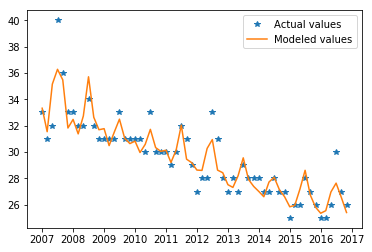

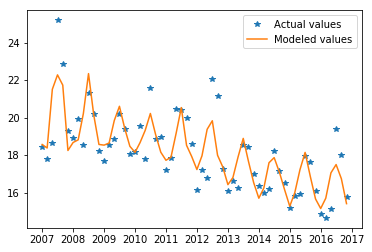

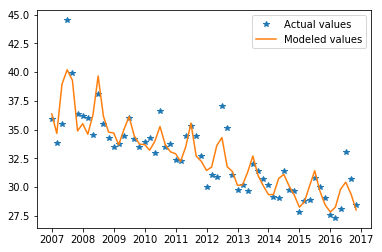

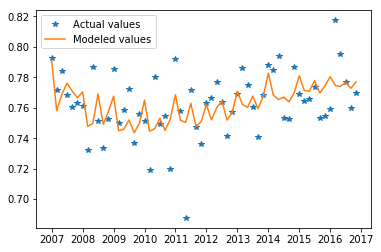

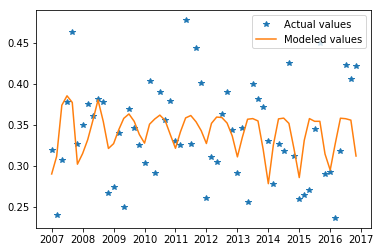

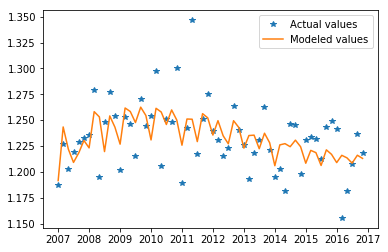

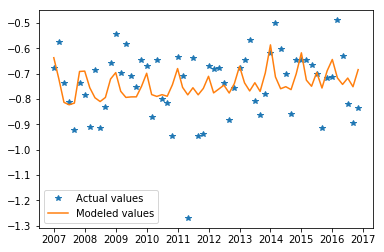

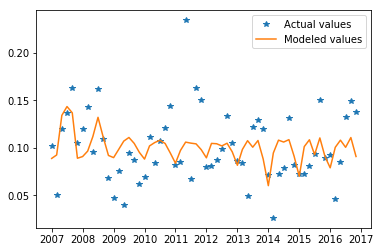

In [17]:
p.regression.PlotAsKey(["Median","Std","Average","Alpha0","Alpha1","Alpha2","Alpha3","Alpha4"])

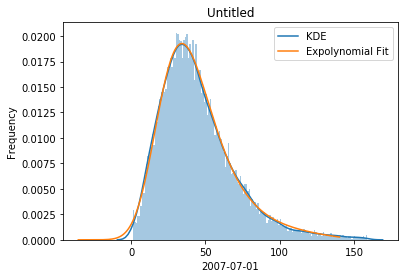

In [18]:
p.DistPlot("2007-07-01",Bins = range(0,160),kde = True)

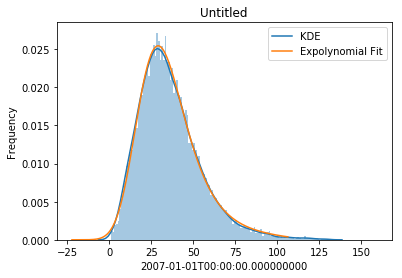

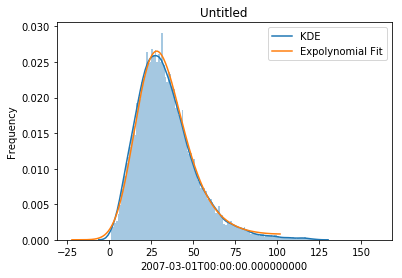

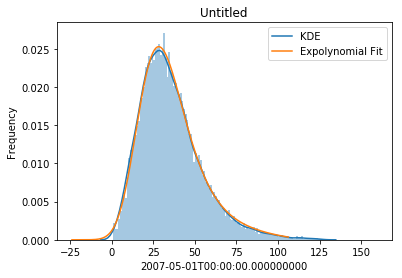

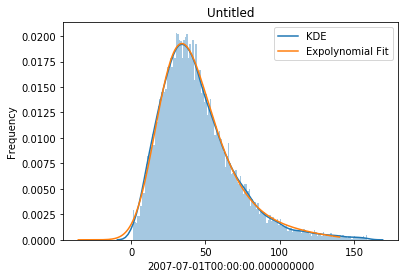

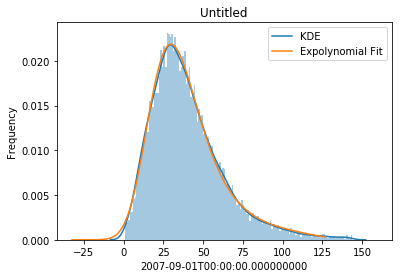

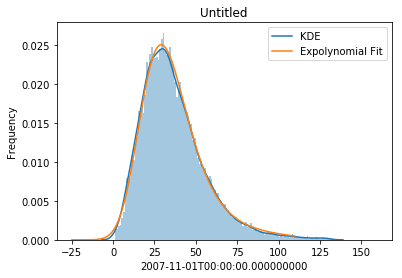

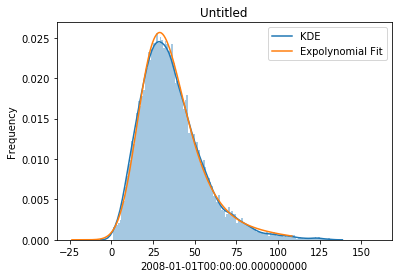

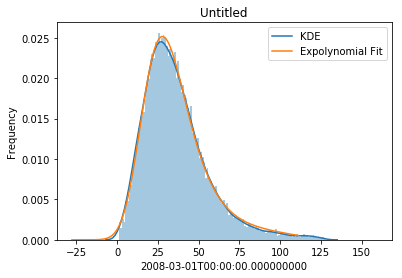

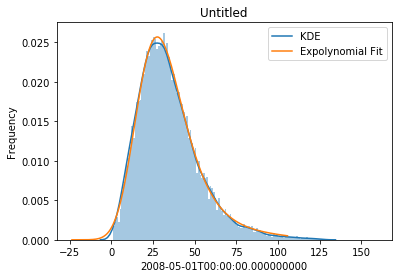

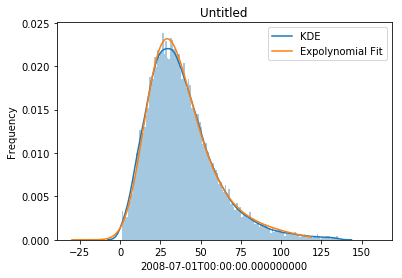

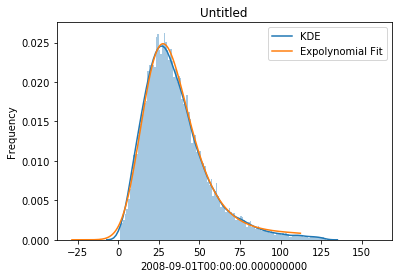

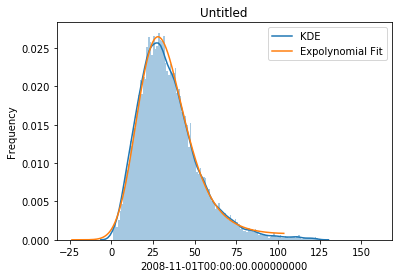

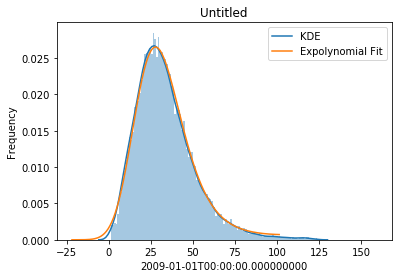

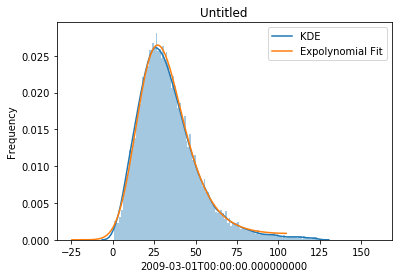

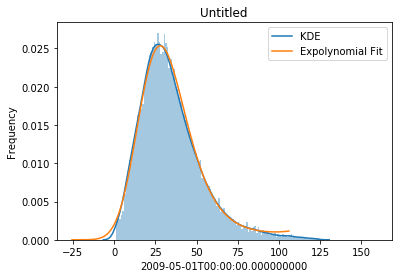

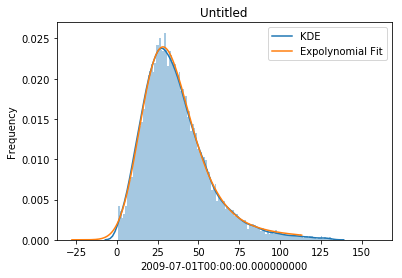

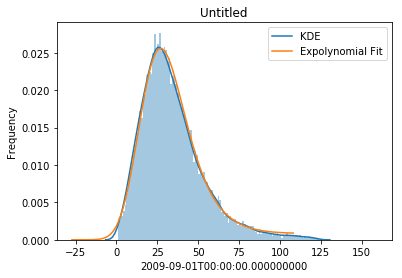

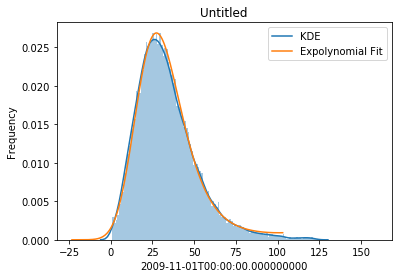

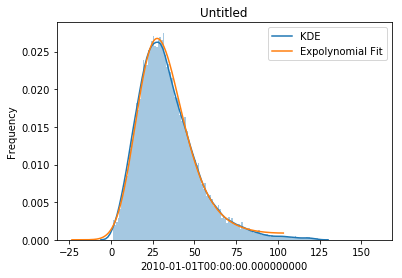

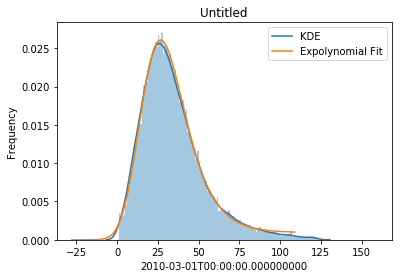

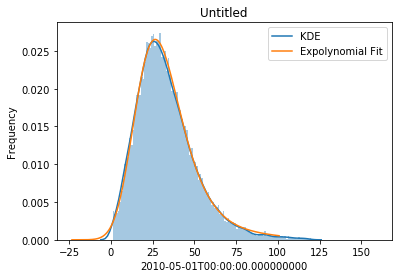

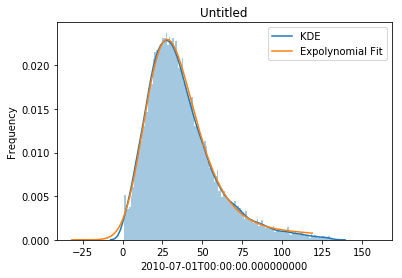

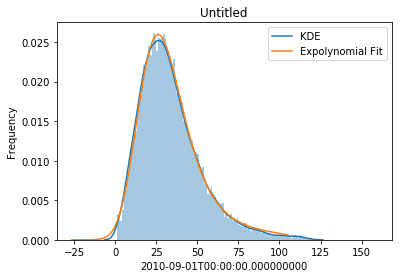

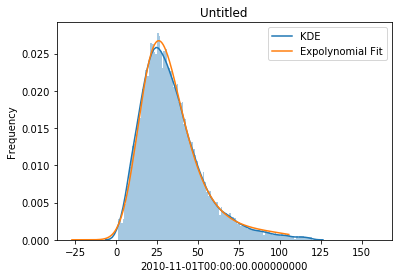

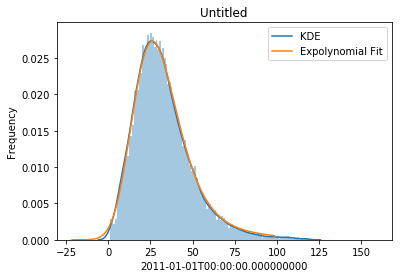

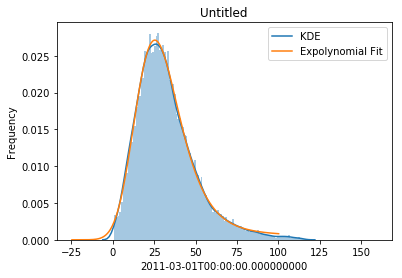

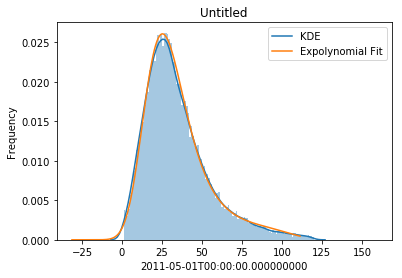

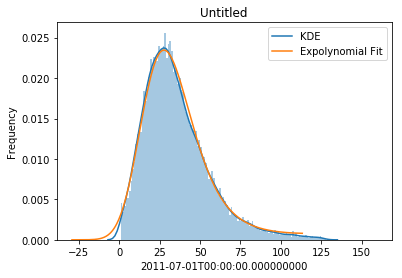

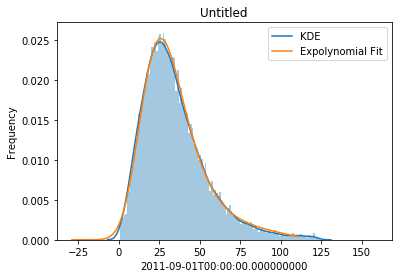

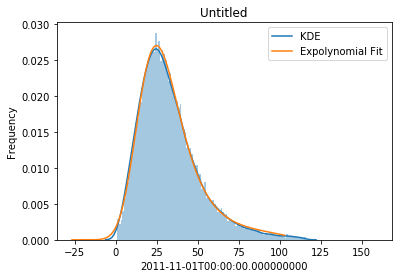

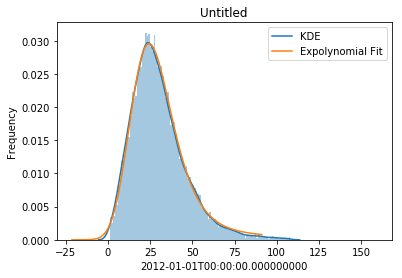

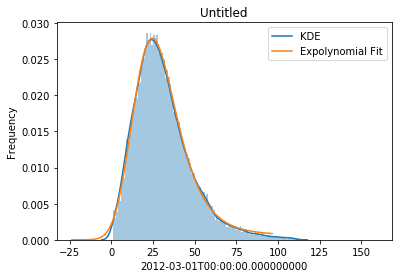

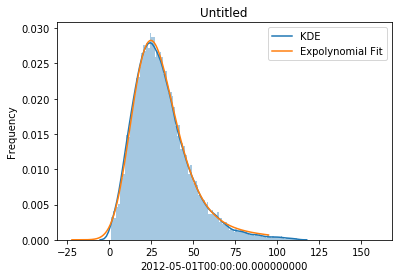

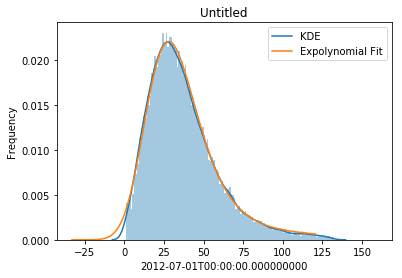

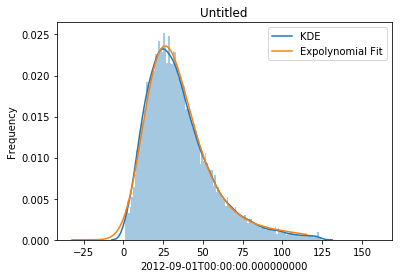

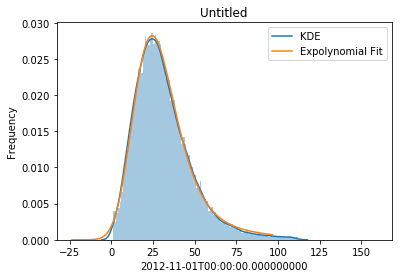

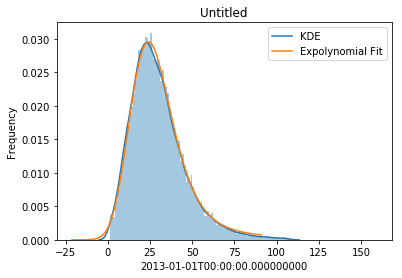

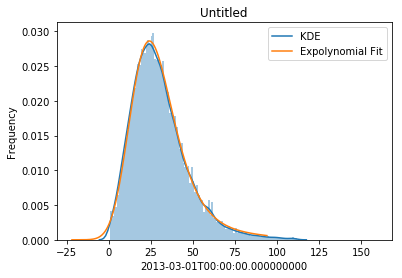

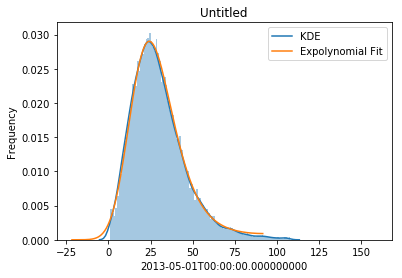

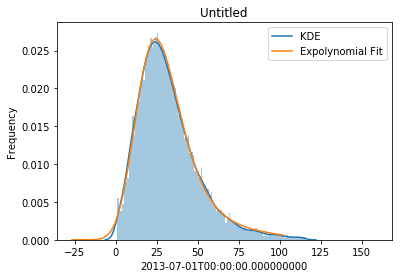

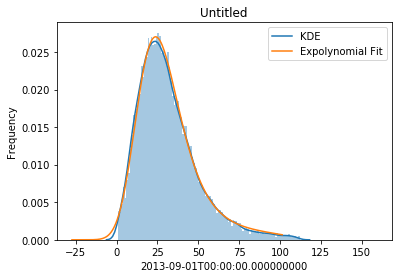

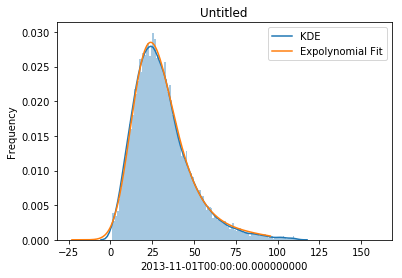

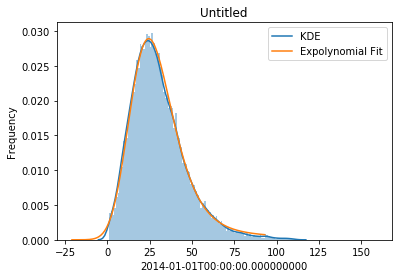

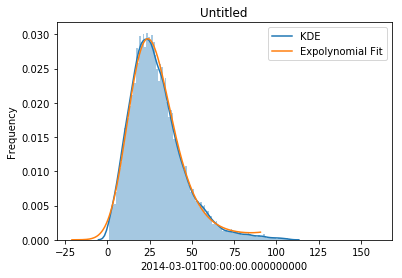

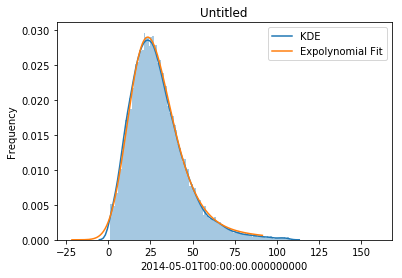

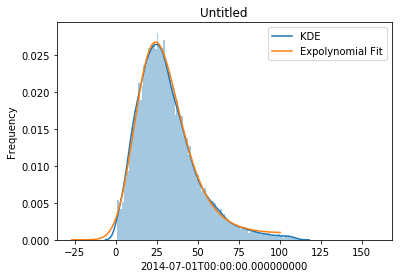

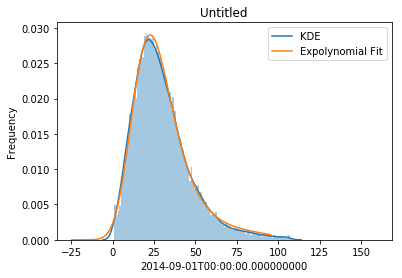

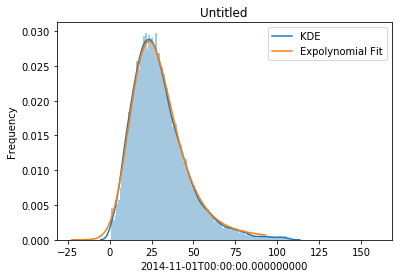

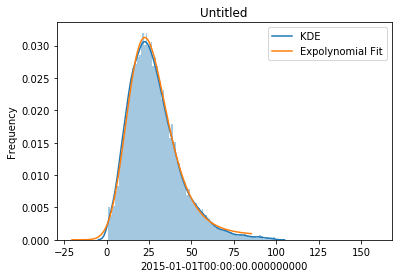

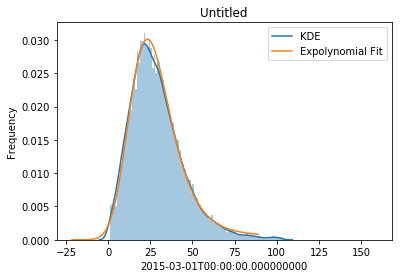

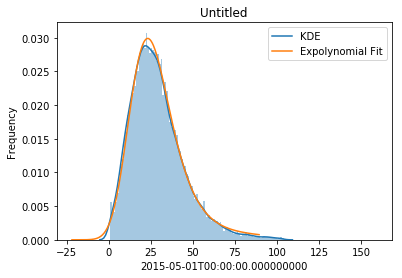

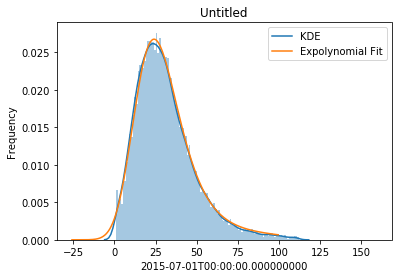

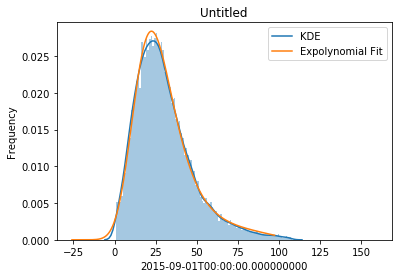

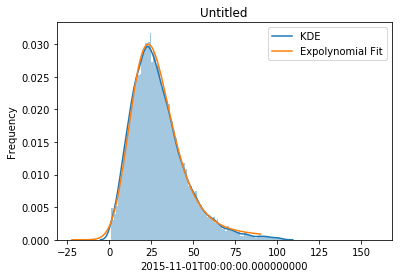

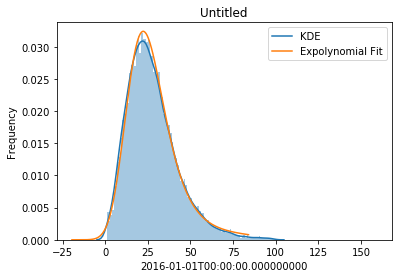

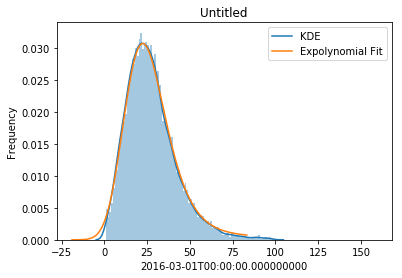

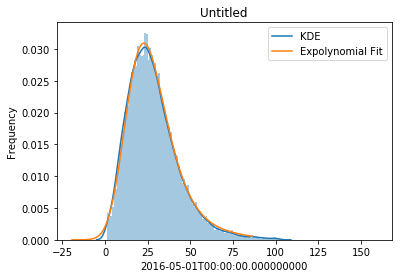

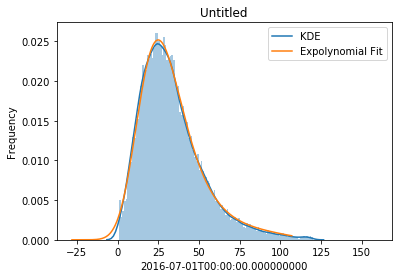

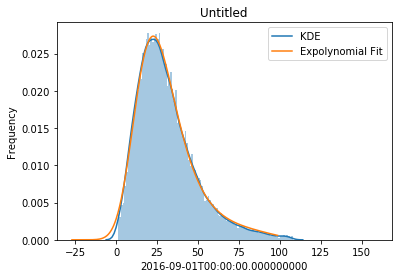

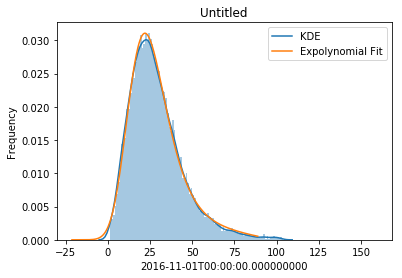

In [19]:
p.DistPlotAll(Bins = range(0,160),kde = True)

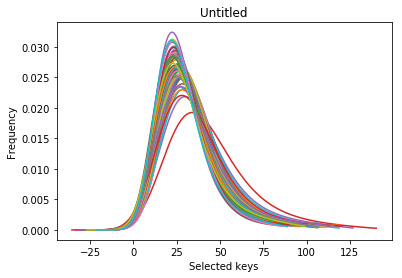

In [20]:
p.CurvePlot(p.dataset.GetKeys())

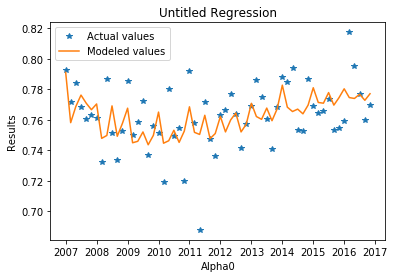

In [21]:
p.PlotByTarget("Alpha0",legend = True)